In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

 81% 10.0M/12.3M [00:00<00:00, 19.8MB/s]
100% 12.3M/12.3M [00:00<00:00, 26.1MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random

In [3]:
random_state = 1

tf.config.experimental.enable_op_determinism()
tf.keras.utils.set_random_seed(random_state)

In [4]:
train_FD001 = pd.read_csv("/content/CMaps/train_FD002.txt",sep=" ",header=None)

test_FD001 = pd.read_csv("/content/CMaps/test_FD002.txt",sep=" ",header=None)

RUL_FD001 = pd.read_csv("/content/CMaps/RUL_FD002.txt", header=None)

In [5]:
columns = ['unit_number','time_(cycles)','operational_setting_1','operational_setting_2','operational_setting_3','T2_Total_temperature_at_fan_inlet_(°R)','T24_Total_temperature_at_LPC_outlet_(°R)','T30_Total_temperature_at_HPC_outlet_(°R)','T50_Total_temperature_at_LPT_outlet_(°R)','P2_Pressure_at_fan_inlet_(psia)','P15_Total_pressure_in_bypass-duct_(psia)','P30_Total_pressure_at_HPC_outlet_(psia)','Nf_Physical_fan_speed_(rpm)',
           'Nc_Physical_core_speed_(rpm)','epr_Engine_pressure_ratio_(P50/P2)','Ps30_Static_pressure_at_HPC_outlet_(psia)','phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)','NRf_Corrected_fan_speed_(rpm)','NRc_Corrected_core_speed_(rpm)','BPR_Bypass_Ratio','farB_Burner_fuel-air_ratio','htBleed_Bleed_Enthalpy','Nf_dmd_Demanded_fan_speed_(rpm)','PCNfR_dmd_Demanded_corrected_fan_speed_(rpm)','W31_HPT_coolant_bleed_(lbm/s)','W32_LPT_coolant_bleed_(lbm/s)', 26, 27 ]

In [6]:
train_FD001.columns = columns
test_FD001.columns = columns

In [7]:
train_FD001.describe()

,unit_number,time_(cycles),operational_setting_1,operational_setting_2,operational_setting_3,T2_Total_temperature_at_fan_inlet_(°R),T24_Total_temperature_at_LPC_outlet_(°R),T30_Total_temperature_at_HPC_outlet_(°R),T50_Total_temperature_at_LPT_outlet_(°R),P2_Pressure_at_fan_inlet_(psia),...,NRc_Corrected_core_speed_(rpm),BPR_Bypass_Ratio,farB_Burner_fuel-air_ratio,htBleed_Bleed_Enthalpy,Nf_dmd_Demanded_fan_speed_(rpm),PCNfR_dmd_Demanded_corrected_fan_speed_(rpm),W31_HPT_coolant_bleed_(lbm/s),W32_LPT_coolant_bleed_(lbm/s),26,27
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,0.0,0.0
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423,NaN,NaN
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500,NaN,NaN
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300,NaN,NaN
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200,NaN,NaN
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200,NaN,NaN
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100,NaN,NaN


In [8]:
train_FD001.drop(columns=[26,27],inplace=True)
test_FD001.drop(columns=[26,27],inplace=True)

In [9]:
#Double check for NaNs
train_FD001.isnull().sum()

unit_number                                     0
time_(cycles)                                   0
operational_setting_1                           0
operational_setting_2                           0
operational_setting_3                           0
T2_Total_temperature_at_fan_inlet_(°R)          0
T24_Total_temperature_at_LPC_outlet_(°R)        0
T30_Total_temperature_at_HPC_outlet_(°R)        0
T50_Total_temperature_at_LPT_outlet_(°R)        0
P2_Pressure_at_fan_inlet_(psia)                 0
P15_Total_pressure_in_bypass-duct_(psia)        0
P30_Total_pressure_at_HPC_outlet_(psia)         0
Nf_Physical_fan_speed_(rpm)                     0
Nc_Physical_core_speed_(rpm)                    0
epr_Engine_pressure_ratio_(P50/P2)              0
Ps30_Static_pressure_at_HPC_outlet_(psia)       0
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)        0
NRf_Corrected_fan_speed_(rpm)                   0
NRc_Corrected_core_speed_(rpm)                  0
BPR_Bypass_Ratio                                0


In [10]:
train_FD001

,unit_number,time_(cycles),operational_setting_1,operational_setting_2,operational_setting_3,T2_Total_temperature_at_fan_inlet_(°R),T24_Total_temperature_at_LPC_outlet_(°R),T30_Total_temperature_at_HPC_outlet_(°R),T50_Total_temperature_at_LPT_outlet_(°R),P2_Pressure_at_fan_inlet_(psia),...,phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi),NRf_Corrected_fan_speed_(rpm),NRc_Corrected_core_speed_(rpm),BPR_Bypass_Ratio,farB_Burner_fuel-air_ratio,htBleed_Bleed_Enthalpy,Nf_dmd_Demanded_fan_speed_(rpm),PCNfR_dmd_Demanded_corrected_fan_speed_(rpm),W31_HPT_coolant_bleed_(lbm/s),W32_LPT_coolant_bleed_(lbm/s)
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [11]:
test_FD001

,unit_number,time_(cycles),operational_setting_1,operational_setting_2,operational_setting_3,T2_Total_temperature_at_fan_inlet_(°R),T24_Total_temperature_at_LPC_outlet_(°R),T30_Total_temperature_at_HPC_outlet_(°R),T50_Total_temperature_at_LPT_outlet_(°R),P2_Pressure_at_fan_inlet_(psia),...,phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi),NRf_Corrected_fan_speed_(rpm),NRc_Corrected_core_speed_(rpm),BPR_Bypass_Ratio,farB_Burner_fuel-air_ratio,htBleed_Bleed_Enthalpy,Nf_dmd_Demanded_fan_speed_(rpm),PCNfR_dmd_Demanded_corrected_fan_speed_(rpm),W31_HPT_coolant_bleed_(lbm/s),W32_LPT_coolant_bleed_(lbm/s)
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [12]:
train_FD001.nunique()

unit_number                                       260
time_(cycles)                                     378
operational_setting_1                             536
operational_setting_2                             105
operational_setting_3                               2
T2_Total_temperature_at_fan_inlet_(°R)              6
T24_Total_temperature_at_LPC_outlet_(°R)         1590
T30_Total_temperature_at_HPC_outlet_(°R)        12305
T50_Total_temperature_at_LPT_outlet_(°R)        15411
P2_Pressure_at_fan_inlet_(psia)                     6
P15_Total_pressure_in_bypass-duct_(psia)           14
P30_Total_pressure_at_HPC_outlet_(psia)          2067
Nf_Physical_fan_speed_(rpm)                       897
Nc_Physical_core_speed_(rpm)                    22434
epr_Engine_pressure_ratio_(P50/P2)                  9
Ps30_Static_pressure_at_HPC_outlet_(psia)         681
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)         1672
NRf_Corrected_fan_speed_(rpm)                     514
NRc_Corrected_core_speed_(rp

In [13]:
test_FD001.nunique()

unit_number                                       259
time_(cycles)                                     367
operational_setting_1                             536
operational_setting_2                             105
operational_setting_3                               2
T2_Total_temperature_at_fan_inlet_(°R)              6
T24_Total_temperature_at_LPC_outlet_(°R)         1385
T30_Total_temperature_at_HPC_outlet_(°R)        10306
T50_Total_temperature_at_LPT_outlet_(°R)        11633
P2_Pressure_at_fan_inlet_(psia)                     6
P15_Total_pressure_in_bypass-duct_(psia)           12
P30_Total_pressure_at_HPC_outlet_(psia)          1772
Nf_Physical_fan_speed_(rpm)                       599
Nc_Physical_core_speed_(rpm)                    16522
epr_Engine_pressure_ratio_(P50/P2)                  9
Ps30_Static_pressure_at_HPC_outlet_(psia)         606
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)         1445
NRf_Corrected_fan_speed_(rpm)                     325
NRc_Corrected_core_speed_(rp

In [14]:
print(train_FD001["P15_Total_pressure_in_bypass-duct_(psia)"].unique())

[ 8.    5.71  9.02  9.03 13.65 21.61 15.49 13.66  5.72 15.5   8.01 21.6
 13.67  9.04]


In [16]:
nu_column = ['operational_setting_3', 'T2_Total_temperature_at_fan_inlet_(°R)', 'P2_Pressure_at_fan_inlet_(psia)', "P15_Total_pressure_in_bypass-duct_(psia)",
            'epr_Engine_pressure_ratio_(P50/P2)', 'farB_Burner_fuel-air_ratio', 'Nf_dmd_Demanded_fan_speed_(rpm)',
            'BPR_Bypass_Ratio', 'PCNfR_dmd_Demanded_corrected_fan_speed_(rpm)']

In [17]:
train_FD001.drop(columns=nu_column, inplace=True)
test_FD001.drop(columns=nu_column, inplace=True)

In [18]:
train_FD001['RUL']  = train_FD001.groupby('unit_number')['time_(cycles)'].apply(lambda x: x.max()-x).values

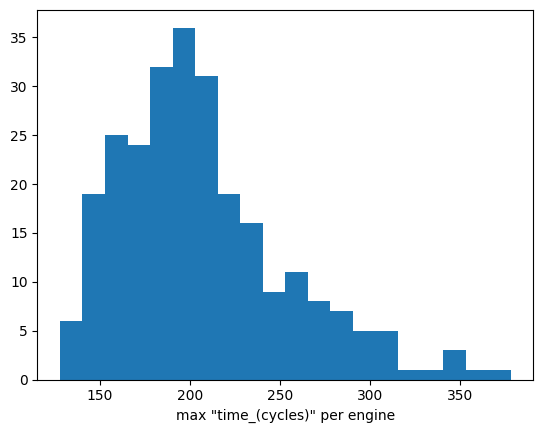

In [19]:
#Distribution of time cycles per engine
plt.hist(x = train_FD001[["unit_number", "time_(cycles)"]].groupby("unit_number").max()['time_(cycles)'], bins=20)
plt.xlabel('max "time_(cycles)" per engine')
plt.show()

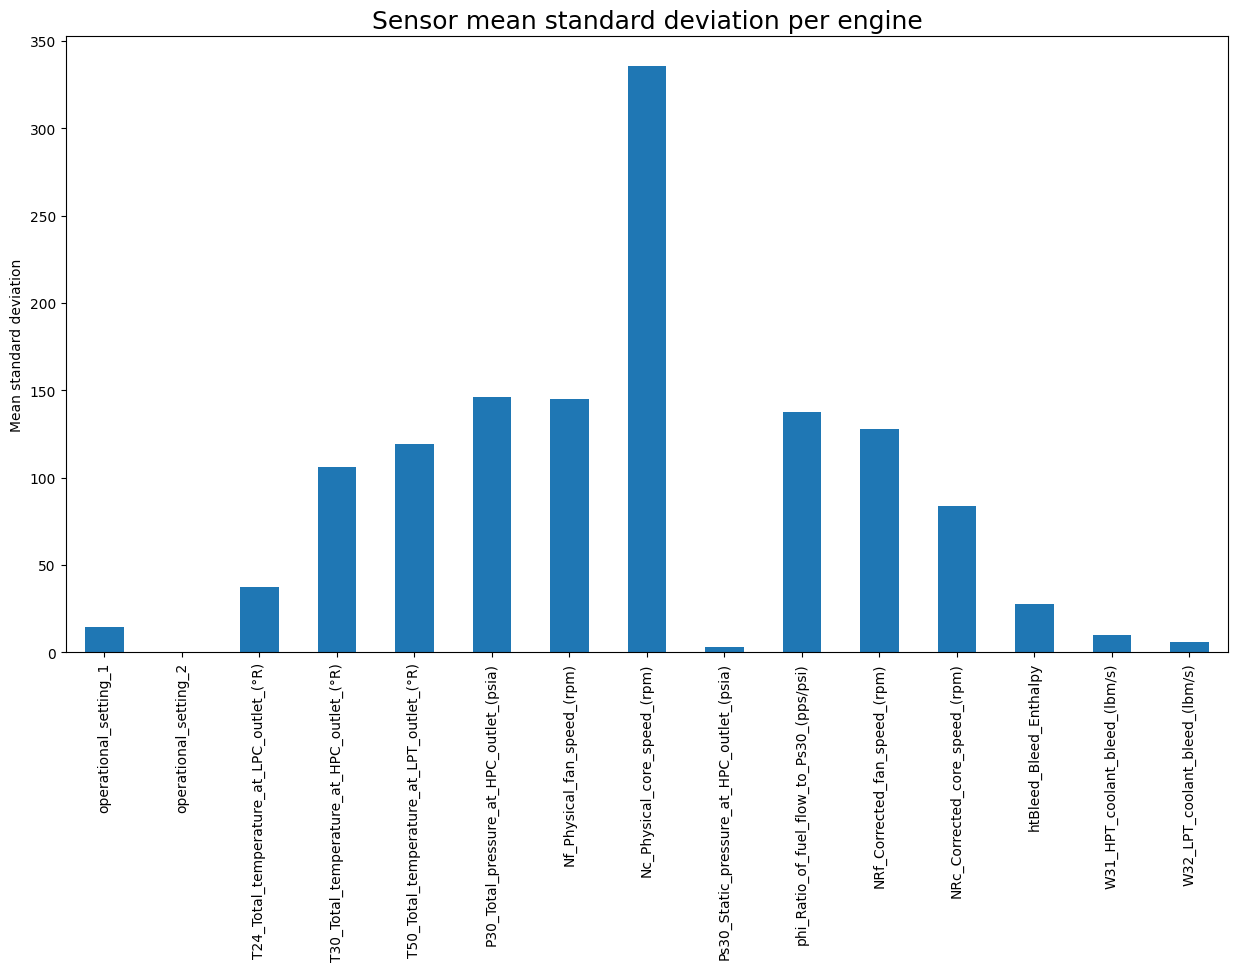

In [20]:
#Checking the mean variability for sensors per engine
std_sensors = train_FD001.drop(["RUL", "time_(cycles)"], axis=1).groupby("unit_number").std().mean()
ax = std_sensors.plot.bar(figsize=(15,8))
ax.set_title("Sensor mean standard deviation per engine", fontsize=18)
ax.set_ylabel("Mean standard deviation")
plt.show()

In [21]:
#Plot sensors from 10 out of 100 engines with corresponding RUL on the x-axis
def plot_signal(df, signal_name):
    plt.figure(figsize=(15,8))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i])

    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(signal_name)
    plt.xlabel('RUL')
    plt.show()

for i in train_FD001.columns[2:-1]:
    plot_signal(train_FD001,str(i))

Output hidden; open in https://colab.research.google.com to view.

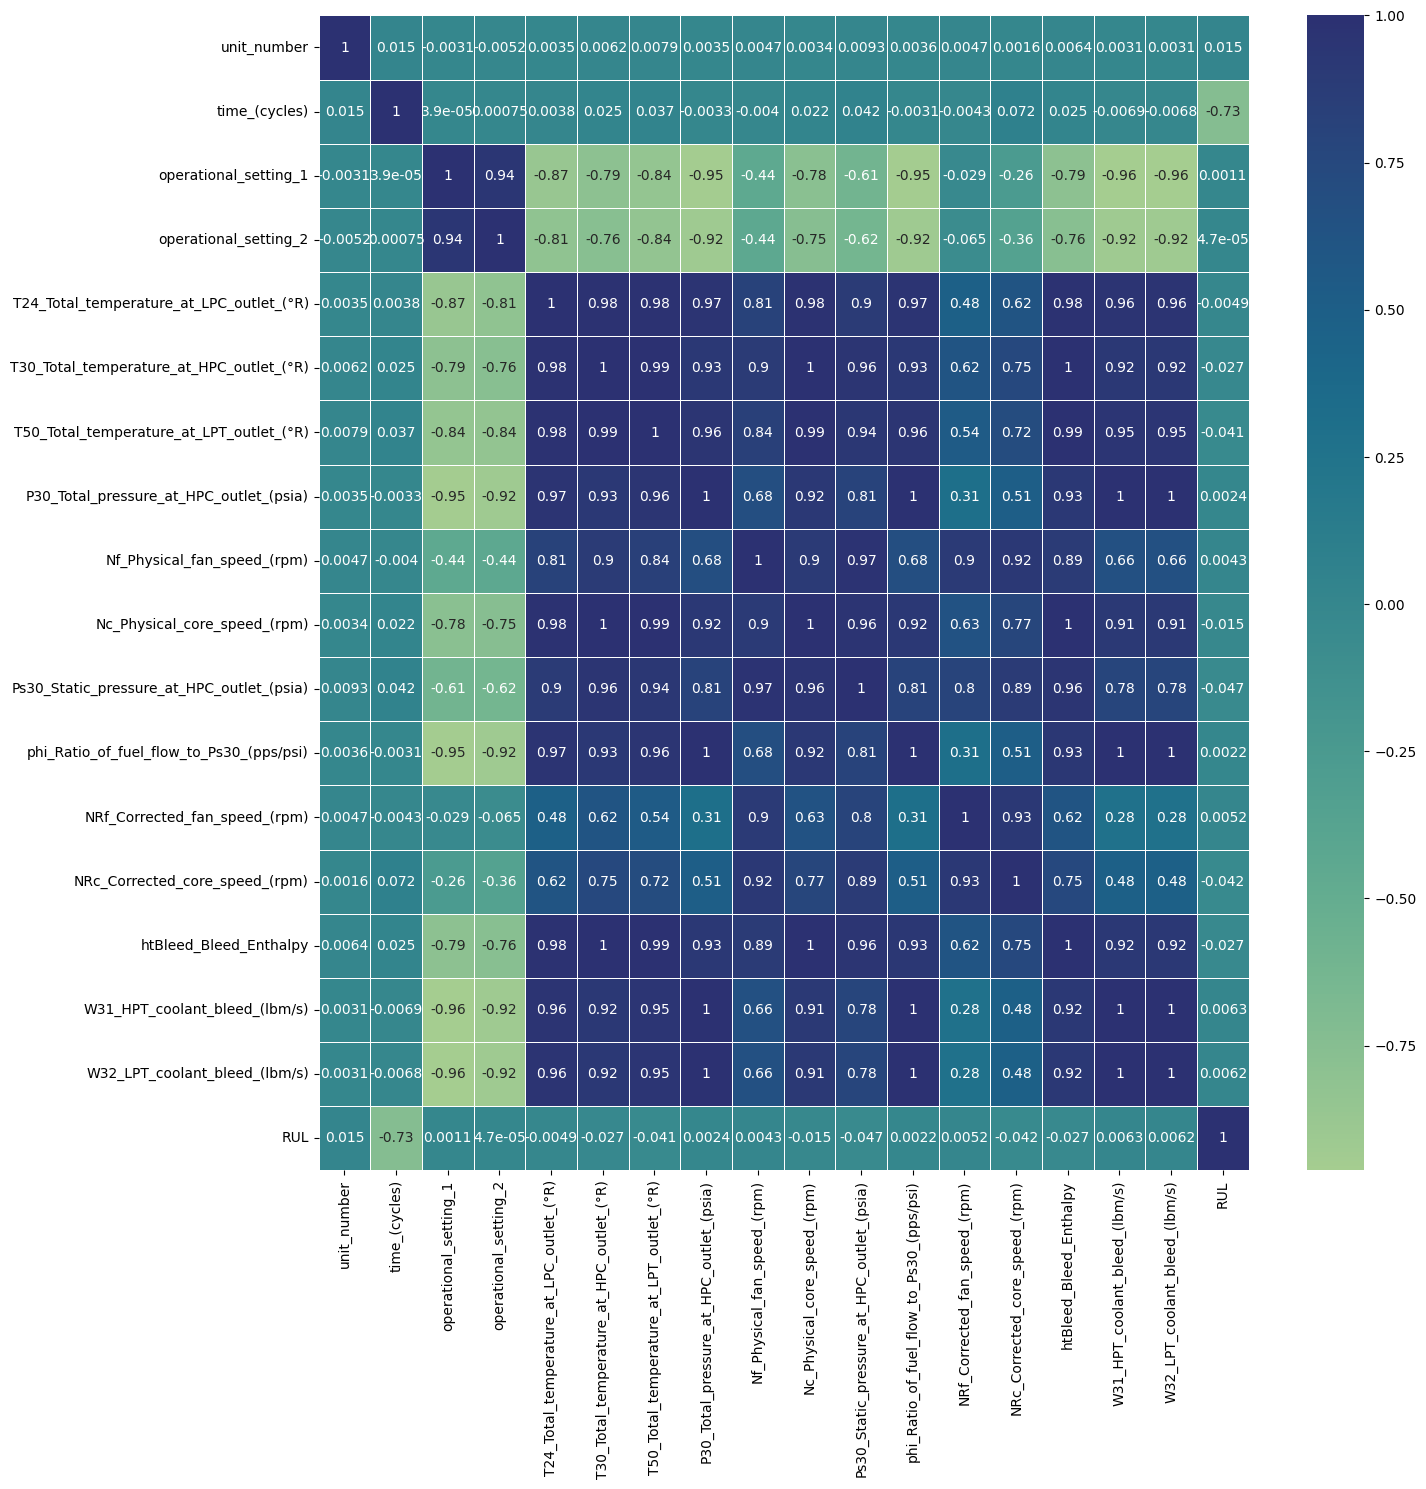

In [22]:
#Correlation matrix
sns.heatmap(train_FD001.corr(),annot=True,cmap="crest",linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [30]:
train_FD001.drop("NRc_Corrected_core_speed_(rpm)", axis=1, inplace=True)
test_FD001.drop("NRc_Corrected_core_speed_(rpm)", axis=1, inplace=True)

In [23]:
def LSTM_preprocessing(data, feature_to_split, target, window_size = 30, feature_to_drop=[], Ceil_RUL=None, shift = 1):
    """
    A preprocessing function for generating LSTM 3D data input, where output first dimension is the number of batches to be made from data, second dimension is window size (timesteps),
    and the third dimension is the number of features.

    input:
    - data: array, data to process in windows (DataFrame)
    - feature_to_split: the name of the single feature which elements are used for selecting rows to split in windows (list/str/int)
    - target: the column of data which is the target of prediction (series)
    - window_size: the size of the window we want for the LSTM (int)
    - feature_to_drop: self explanatory, could be the feature_to_split (list)
    - Ceil_RUL: if int, the max RUL we want, will change all greater RULs to it (int)
    - shift: distance between a window and another. Data will repeat if shift < window_size (int)

    output: an 3D ndarray which is divided in windows
    """
    assert feature_to_split in data.columns , f"feature_to_split not in data features"
    assert type(feature_to_drop) == list , f"feature_to_drop must be a list"

    num_split = np.unique(data[feature_to_split])
    num_features = data.shape[1]-len(feature_to_drop)
    processed_data = np.zeros([0, window_size,num_features])
    processed_target = np.zeros(0)

    for i in num_split:
        data_temp = data[data[feature_to_split] == i].drop(feature_to_drop, axis=1)
        assert len(data_temp) - window_size>0, f"Window size greater than data at unit number: {i}"
        n_batches = (len(data_temp) - window_size)//shift + 1
        singular_output_data = np.zeros([n_batches, window_size,num_features])
        singular_processed_target = np.zeros([n_batches])

        for n_batch in range(len(data_temp) - window_size,-1,-shift):
            n_batches-=1
            singular_output_data[n_batches] = data_temp[n_batch:n_batch+window_size]
            singular_processed_target[n_batches] = target[data[feature_to_split] == i].iloc[n_batch+window_size-1]
        processed_data = np.append(processed_data, singular_output_data, axis=0)
        processed_target = np.append(processed_target, singular_processed_target, axis=0)

    if Ceil_RUL is not None:
        processed_target[processed_target>Ceil_RUL] = Ceil_RUL

    return processed_data, processed_target

In [24]:
def test_preprocessing(data, feature_to_split, feature_to_drop, window_size = 30):
    """
    A preprocessing function for generating LSTM 3D data input for test, where output first dimension is the number of batches made from data, second dimension is window size (timesteps),
    and the third dimension is the number of features.
    This function will take only the last window data from every feature_to_split in order to make predictions.

    input:
    -data: array, data to process in windows (DataFrame)
    -feature_to_split: the single feature which is used as index, list/str/int
    -feature_to_drop: self explanatory (list)

    output: a 3D array which contains the last window of data for each feature_to_split
    """
    assert(type(feature_to_drop) == list), f"feature_to_drop must be a list"

    num_split = np.unique(data[feature_to_split])
    num_features = data.shape[1]-len(feature_to_drop)
    processed_data = np.zeros([0, window_size,num_features])

    for i in num_split:
        data_temp = data[data[feature_to_split] == i].drop(feature_to_drop, axis=1)
        singular_output_data = np.zeros([1, window_size,num_features])

        singular_output_data[0] = data_temp[-window_size:]

        processed_data = np.append(processed_data, singular_output_data, axis=0)

    return processed_data

In [31]:
#Standard scale the data, except from categorical numerical columns such as "unit_number", which is re-added after standard scaling. "time_(cycles)" is dropped.
scaler = StandardScaler()

train_scaled = pd.DataFrame(np.c_[train_FD001[["unit_number"]], scaler.fit_transform(train_FD001.drop(["unit_number","time_(cycles)", "RUL"], axis=1))])
test_scaled = pd.DataFrame(np.c_[test_FD001[["unit_number"]], scaler.transform(test_FD001.drop(["unit_number","time_(cycles)"], axis=1))])

In [32]:
pd.DataFrame(train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.745895,0.864298,-0.653071,-0.579176,-0.572622,-0.602496,-0.042898,-0.545819,-0.298598,-0.603008,0.415116,-0.515579,-0.613958,-0.619148
1,1.0,1.220553,0.866878,-0.798422,-0.630051,-0.668741,-0.986938,-0.119202,-0.658830,-0.242911,-0.985404,0.414648,-0.659701,-1.051681,-1.048190
2,1.0,0.067836,0.160457,-1.136055,-1.540521,-1.326301,-0.732150,-2.160819,-1.559759,-1.947558,-0.739869,-2.393490,-1.416342,-0.679819,-0.641912
3,1.0,1.221198,0.869459,-0.808881,-0.622406,-0.663705,-0.987280,-0.119133,-0.658830,-0.317161,-0.983225,0.414257,-0.695731,-1.033443,-1.013808
4,1.0,0.067951,0.155618,-1.142491,-1.531554,-1.322271,-0.736670,-2.160888,-1.584148,-1.885683,-0.739215,-2.393724,-1.416342,-0.674753,-0.666180


In [33]:
print("Minimum window size possible for train: ", train_FD001[["unit_number", "time_(cycles)"]].groupby("unit_number").max().values.min())
print("Minimum window size possible for test: ", test_FD001[["unit_number", "time_(cycles)"]].groupby("unit_number").max().values.min())

Minimum window size possible for train:  128
Minimum window size possible for test:  21


In [40]:
window_size = 21

#Column 0 is "unit_number", it used to split the data by engine then dropped, as we do not want this feature for prediction
X, y = LSTM_preprocessing(train_scaled, 0, train_FD001['RUL'], window_size, [0], Ceil_RUL=150, shift = 1)

#Manually shuffle the dataset to ensure reproducibility, setting shuffle=false later on the model
np.random.seed(random_state)
shuffled_index = np.random.permutation(len(X))
X, y = X[shuffled_index], y[shuffled_index]

In [41]:
test_processed = test_preprocessing(test_scaled, 0, [0], window_size=window_size)

In [42]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("test_processed shape: ", test_processed.shape)
print("RUL_FD001 shape: ", RUL_FD001.shape)

X shape:  (48559, 21, 14)
y shape:  (48559,)
test_processed shape:  (259, 21, 14)
RUL_FD001 shape:  (259, 1)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = random_state)
#X_test, y_test will be used as validation data
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (38847, 21, 14)
X_test shape:  (9712, 21, 14)
y_train shape:  (38847,)
y_test shape:  (9712,)


In [44]:
def s_score(RUL_true, RUL_predicted, a1=10, a2=13):
    """
    Input: 1D np.array
    Late prediction (negative diff) are more penalized than early prediction
    The lower the score the better
    """
    diff = np.array(RUL_true) - np.array(RUL_predicted)
    s = sum(np.exp(-diff[diff<0]/a1)-1) + sum(np.exp(diff[diff>=0]/a2)-1)
    return s

In [45]:
def s_score_model(RUL_true, RUL_predicted, a1=10, a2=13):
    """
    Input: 1D tf.tensor
    Late prediction (negative diff) are more penalized than early prediction
    """
    diff = tf.subtract(RUL_true,RUL_predicted)
    s = tf.reduce_sum(tf.where(diff < 0, tf.exp(-diff/a1)-1, tf.exp(diff/a2)-1), axis=0)
    return s

In [46]:
initializer = tf.initializers.GlorotNormal(seed=random_state)

model = Sequential([
    layers.LSTM(128, input_shape = (X.shape[1], X.shape[2]), return_sequences=True, activation = "tanh", bias_initializer="ones", kernel_initializer=initializer,
            kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
               ),
    layers.LSTM(64, activation = "tanh", bias_initializer="ones", kernel_initializer=initializer,
            kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3),
               ),
    layers.Dropout(0.5, seed=random_state),
    layers.Dense(32, activation = "relu", kernel_initializer=initializer,
                ),
    layers.Dense(8, activation = "relu", kernel_initializer=initializer,
                ),
    layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = s_score_model, metrics=["mse"], optimizer = opt)

In [47]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_test, y_test),
                    shuffle = False,
                    batch_size = 96, verbose = 2)

Epoch 1/30
405/405 - 43s - loss: 705094.6875 - mse: 5761.4199 - val_loss: 18430.1777 - val_mse: 2837.5935 - 43s/epoch - 105ms/step
Epoch 2/30
405/405 - 34s - loss: 24024.8887 - mse: 2860.5762 - val_loss: 18270.1582 - val_mse: 2818.7612 - 34s/epoch - 85ms/step
Epoch 3/30
405/405 - 37s - loss: 24049.0137 - mse: 2865.2068 - val_loss: 18195.0000 - val_mse: 2808.5081 - 37s/epoch - 92ms/step
Epoch 4/30
405/405 - 36s - loss: 23986.5312 - mse: 2856.8157 - val_loss: 18198.4141 - val_mse: 2809.0073 - 36s/epoch - 90ms/step
Epoch 5/30
405/405 - 37s - loss: 23753.4727 - mse: 2852.3384 - val_loss: 18280.7324 - val_mse: 2820.1211 - 37s/epoch - 91ms/step
Epoch 6/30
405/405 - 38s - loss: 23745.4512 - mse: 2854.1809 - val_loss: 18352.7266 - val_mse: 2828.8970 - 38s/epoch - 94ms/step
Epoch 7/30
405/405 - 36s - loss: 23217.9512 - mse: 2837.8997 - val_loss: 18238.5879 - val_mse: 2814.6296 - 36s/epoch - 90ms/step
Epoch 8/30
405/405 - 36s - loss: 23668.2656 - mse: 2854.2573 - val_loss: 19187.3789 - val_mse: 

In [48]:
RUL_predicted = model.predict(test_processed)

MSE = mean_squared_error(RUL_FD001, RUL_predicted)
MAE = np.abs(RUL_FD001 - RUL_predicted).values.mean()
std_AE = np.abs(RUL_FD001 - RUL_predicted).values.std()
print("MSE: ", MSE.round(2))
print("RMSE: ", np.sqrt(MSE).round(2))
print("MAE: ", MAE.round(2))
print("std_AE: ", std_AE.round(2))
print("s_score: ", s_score(RUL_FD001, RUL_predicted).round(2))
print("s_score: ", r2_score(RUL_FD001, RUL_predicted).round(2))

9/9 [==============================] - 1s 13ms/step
MSE:  925.13
RMSE:  30.42
MAE:  21.58
std_AE:  21.44
s_score:  14576.54
s_score:  0.68


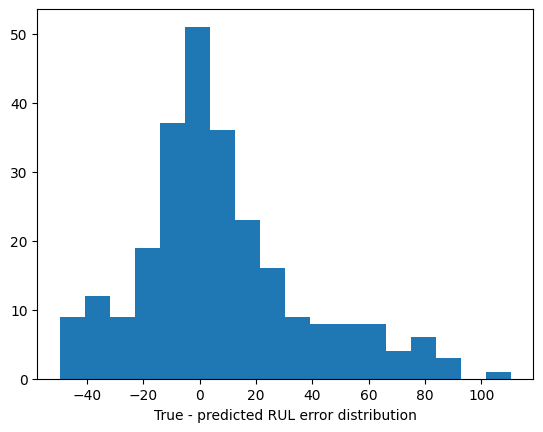

In [49]:
diff = np.array(RUL_FD001-RUL_predicted)
plt.hist(diff, bins='auto')
plt.xlabel("True - predicted RUL error distribution")
plt.show()

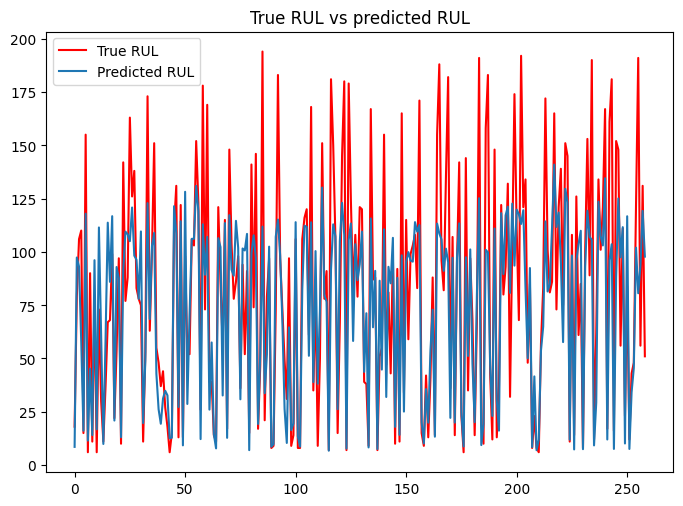

In [50]:
#True RUL vs predicted RUL
fig, axes = plt.subplots(1, figsize = (7,5))
fig.tight_layout()
axes.plot(RUL_FD001, label = "True RUL", color = "red")
axes.plot(RUL_predicted, label = "Predicted RUL")
axes.set_title("True RUL vs predicted RUL")
axes.legend()
plt.show()

# THE END